# Assignments related to statistics

In [1]:
import statistics as s 
import scipy.stats as ss
import numpy as np
import pandas as pd

In [2]:
heights = [180,160,179,185,160,145,176,175,180,199]

In [3]:
weights = [90,80,76,88,77,88,96,56,59,67]

# Find out mean and median of heights and weights

In [4]:
s.mean(heights), s.mean(weights)

(173.9, 77.7)

In [5]:
s.median(heights), s.median(weights)

(177.5, 78.5)

# Find out mode of weights

In [6]:
s.mode(weights)

88

# Find out range for heights and weights

In [7]:
max(heights) - min(heights)

54

In [8]:
print(f"Range of weights = {max(weights) - min(weights)}")

Range of weights = 40


# Find out variance and standard deviation of heights and weights

In [9]:
print(f"Variance of heights = {s.variance(heights):5.2f}, Standard deviation of heights = {s.stdev(heights):5.2f}")

Variance of heights = 231.21, Standard deviation of heights = 15.21


In [10]:
print(f"Variance of weights = {s.variance(weights):5.2f}, Standard deviation of weights = {s.stdev(weights):5.2f}")

Variance of weights = 182.46, Standard deviation of weights = 13.51


# Display IQR of heights

In [11]:
ss.iqr(heights)

16.25

# Display outliers in heights.Add a few new values in heights

In [12]:
heights_upd = [180,160,179,185,160,145,176,175,180,199,125,215]
q1 = np.quantile(heights_upd,0.25)
q3 = np.quantile(heights_upd,0.75)
iqr = q3 - q1

In [13]:
iqr

21.25

# Display outliers in heights.Consider adding a few new values, if necessary

In [14]:
heights_upd = [180,160,179,185,160,145,176,175,180,199,125,215]
q1 = np.quantile(heights_upd,0.25)
q3 = np.quantile(heights_upd,0.75)
iqr = q3 - q1
outliers = []

for n in heights_upd:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)
print(f"Number of Outliers = {len(outliers)}, Outliers = {outliers}")   

Number of Outliers = 2, Outliers = [125, 215]


# Display skewness of heights

In [15]:
ss.skew(weights)

-0.370716544807603

# Check whether there is any kurtosis in heights

In [16]:
ss.kurtosis(heights)

-0.25691423931847623

In [17]:
ss.kurtosis(weights)

-1.0911677144309107

# Display coefficient and p-value of weights and heights

In [18]:
ss.pearsonr(heights,weights)

(-0.2744349737525768, 0.4428803231273694)

### Find slope and intercept for weight(y) and height(x)

In [19]:
height_reg = ss.linregress(heights,weights)
print(height_reg)

LinregressResult(slope=-0.24378874525445718, intercept=120.0948627997501, rvalue=-0.2744349737525768, pvalue=0.4428803231273696, stderr=0.3020134001954503, intercept_stderr=52.700516228180504)


# Display estimated weights for the following heights 180,190,200

In [20]:
heights_list = [180,190,200]
weights_list = []

for n in heights_list:
    weight = height_reg.intercept + height_reg.slope * n
    weights_list.append(weight)
    
print(heights_list,weights_list)    

[180, 190, 200] [76.21288865394781, 73.77500120140324, 71.33711374885867]


# Exercise related to house data

In [21]:
sizes = [1000,2000,1500,1100,1670,1550,3000,2400,3400,1200]
ages =  [5,6,2,10,11,7,5,6,8,1]
prices = [15.5,25.5,22,10.5,30,35,45,25,43,22]

# Calculate skewness in house prices

In [22]:
ss.skew(prices)

0.2577054368611705

# Calculate variance in house sizes

In [23]:
s.variance(sizes)

665795.5555555555

# Display correlation and p-value between size and price

In [24]:
ss.pearsonr(sizes,prices)

(0.8361850461836101, 0.0025725398031045715)

# Display mode for ages

In [25]:
ss.mode(ages)

ModeResult(mode=array([5]), count=array([2]))

# Calculate slope and intercept for size and price so that we can calculate price for given size

In [26]:
size_reg = ss.linregress(sizes,prices)
size_reg

LinregressResult(slope=0.011393721128941818, intercept=5.9070168353315005, rvalue=0.83618504618361, pvalue=0.002572539803104576, stderr=0.002642123965417807, intercept_stderr=5.376667089848954)

In [27]:
sizes_list = [1500,1550,1600,1850]
prices_list = []

for n in sizes_list:
    price = size_reg.slope * n + size_reg.intercept
    prices_list.append(price)

print(sizes_list,prices_list)    

[1500, 1550, 1600, 1850] [22.997598528744227, 23.56728458519132, 24.13697064163841, 26.985400923873865]


### Based on age and size of the house find price. Use multi-variable regression to calculate price.

In [28]:
size_reg = ss.linregress(sizes,prices)
size_reg

LinregressResult(slope=0.011393721128941818, intercept=5.9070168353315005, rvalue=0.83618504618361, pvalue=0.002572539803104576, stderr=0.002642123965417807, intercept_stderr=5.376667089848954)

In [29]:
age_reg = ss.linregress(ages,prices)
age_reg

LinregressResult(slope=0.3053993250843644, intercept=25.48706411698538, rvalue=0.08633046178089812, pvalue=0.8125533057129929, stderr=1.246047411291669, intercept_stderr=8.460285714425103)

In [30]:
size_avg = s.mean(sizes)
age_avg = s.mean(ages)
price_avg = s.mean(prices)

In [31]:
# Calculate intercept for multiple variables
intercept = price_avg - size_reg.slope * size_avg - age_reg.slope * age_avg
intercept

4.044080952316878

In [32]:
# Calculate price based on both size and age
for (size, age, price) in zip(sizes, ages, prices):
    p_price = intercept + size * size_reg.slope + age * age_reg.slope
    # Find out the difference between predicted price and actual price
    diff_price = p_price - price
    print(f"{size:8}  {age:8}  {p_price:8.2f}  {price:8.2f}    {diff_price:8.2f}")

    1000         5     16.96     15.50        1.46
    2000         6     28.66     25.50        3.16
    1500         2     21.75     22.00       -0.25
    1100        10     19.63     10.50        9.13
    1670        11     26.43     30.00       -3.57
    1550         7     23.84     35.00      -11.16
    3000         5     39.75     45.00       -5.25
    2400         6     33.22     25.00        8.22
    3400         8     45.23     43.00        2.23
    1200         1     18.02     22.00       -3.98


# Draw plots to visualize data

In [33]:
df = pd.DataFrame({"weight" : weights, "height"  : heights})
df

,weight,height
0,90,180
1,80,160
2,76,179
3,88,185
4,77,160
5,88,145
6,96,176
7,56,175
8,59,180
9,67,199


# Draw a histogram for weights

<AxesSubplot:ylabel='Frequency'>

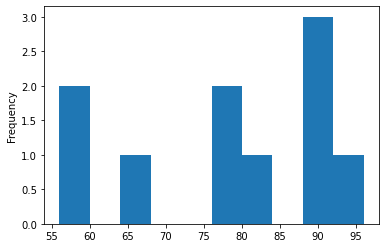

In [34]:
df["weight"].plot.hist()

# Display a scatter plot for weights and heights

<AxesSubplot:ylabel='Frequency'>

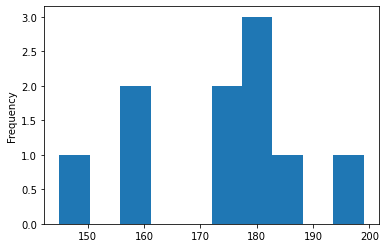

In [35]:
df["height"].plot.hist()

# Display a scatter plot for weights and heights

<AxesSubplot:xlabel='height', ylabel='weight'>

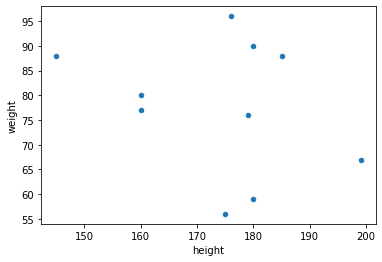

In [36]:
df.plot.scatter(x = "height", y = "weight")

# Display box plot for heights with meanline

<AxesSubplot:>

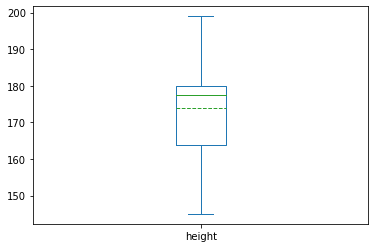

In [39]:
df["height"].plot.box(showmeans = True, meanline = True)